<p style="text-align:center">
    <a href="https://skills.network" target="_blank">
    <img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/assets/logos/SN_web_lightmode.png" width="200" alt="Skills Network Logo"  />
    </a>
</p>


# **Scatter Plot**


Estimated time needed: **45** minutes


## Overview

In this lab, you will focus on creating and interpreting scatter plots to visualize relationships between variables and trends in the dataset. The provided dataset will be directly loaded into a pandas DataFrame, and various scatter plot-related visualizations will be created to explore developer trends, compensation, and preferences.



## Objectives


In this lab, you will:

- Create and analyze scatter plots to examine relationships between variables.

- Use scatter plots to identify trends and patterns in the dataset.

- Focus on visualizations centered on scatter plots for better data-driven insights.


## Setup: Working with the Database



**Install and import the required libraries**


In [288]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots
from plotly.offline import init_notebook_mode, iplot

#### Step 1: Load the dataset


In [289]:
file_path = "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/n01PQ9pSmiRX6520flujwQ/survey-data.csv"

df = pd.read_csv(file_path)
df.head()

,ResponseId,MainBranch,Age,Employment,RemoteWork,Check,CodingActivities,EdLevel,LearnCode,LearnCodeOnline,...,JobSatPoints_6,JobSatPoints_7,JobSatPoints_8,JobSatPoints_9,JobSatPoints_10,JobSatPoints_11,SurveyLength,SurveyEase,ConvertedCompYearly,JobSat
0,1,I am a developer by profession,Under 18 years old,"Employed, full-time",Remote,Apples,Hobby,Primary/elementary school,Books / Physical media,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2,I am a developer by profession,35-44 years old,"Employed, full-time",Remote,Apples,Hobby;Contribute to open-source projects;Other...,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",Books / Physical media;Colleague;On the job tr...,Technical documentation;Blogs;Books;Written Tu...,...,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN
2,3,I am a developer by profession,45-54 years old,"Employed, full-time",Remote,Apples,Hobby;Contribute to open-source projects;Other...,"Master’s degree (M.A., M.S., M.Eng., MBA, etc.)",Books / Physical media;Colleague;On the job tr...,Technical documentation;Blogs;Books;Written Tu...,...,NaN,NaN,NaN,NaN,NaN,NaN,Appropriate in length,Easy,NaN,NaN
3,4,I am learning to code,18-24 years old,"Student, full-time",NaN,Apples,NaN,Some college/university study without earning ...,"Other online resources (e.g., videos, blogs, f...",Stack Overflow;How-to videos;Interactive tutorial,...,NaN,NaN,NaN,NaN,NaN,NaN,Too long,Easy,NaN,NaN
4,5,I am a developer by profession,18-24 years old,"Student, full-time",NaN,Apples,NaN,"Secondary school (e.g. American high school, G...","Other online resources (e.g., videos, blogs, f...",Technical documentation;Blogs;Written Tutorial...,...,NaN,NaN,NaN,NaN,NaN,NaN,Too short,Easy,NaN,NaN


In [290]:
# Explore the DataFrame:
df.describe()

,ResponseId,CompTotal,WorkExp,JobSatPoints_1,JobSatPoints_4,JobSatPoints_5,JobSatPoints_6,JobSatPoints_7,JobSatPoints_8,JobSatPoints_9,JobSatPoints_10,JobSatPoints_11,ConvertedCompYearly,JobSat
count,65437.000000,3.374000e+04,29658.000000,29324.000000,29393.000000,29411.000000,29450.000000,29448.00000,29456.000000,29456.000000,29450.000000,29445.000000,2.343500e+04,29126.000000
mean,32719.000000,2.963841e+145,11.466957,18.581094,7.522140,10.060857,24.343232,22.96522,20.278165,16.169432,10.955713,9.953948,8.615529e+04,6.935041
std,18890.179119,5.444117e+147,9.168709,25.966221,18.422661,21.833836,27.089360,27.01774,26.108110,24.845032,22.906263,21.775652,1.867570e+05,2.088259
min,1.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,1.000000e+00,0.000000
25%,16360.000000,6.000000e+04,4.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,3.271200e+04,6.000000
50%,32719.000000,1.100000e+05,9.000000,10.000000,0.000000,0.000000,20.000000,15.00000,10.000000,5.000000,0.000000,0.000000,6.500000e+04,7.000000
75%,49078.000000,2.500000e+05,16.000000,22.000000,5.000000,10.000000,30.000000,30.00000,25.000000,20.000000,10.000000,10.000000,1.079715e+05,8.000000
max,65437.000000,1.000000e+150,50.000000,100.000000,100.000000,100.000000,100.000000,100.00000,100.000000,100.000000,100.000000,100.000000,1.625660e+07,10.000000


In [291]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 65437 entries, 0 to 65436
Columns: 114 entries, ResponseId to JobSat
dtypes: float64(13), int64(1), object(100)
memory usage: 56.9+ MB


In [292]:
with pd.option_context('display.max_columns', None):
    display(df.head())

,ResponseId,MainBranch,Age,Employment,RemoteWork,Check,CodingActivities,EdLevel,LearnCode,LearnCodeOnline,TechDoc,YearsCode,YearsCodePro,DevType,OrgSize,PurchaseInfluence,BuyNewTool,BuildvsBuy,TechEndorse,Country,Currency,CompTotal,LanguageHaveWorkedWith,LanguageWantToWorkWith,LanguageAdmired,DatabaseHaveWorkedWith,DatabaseWantToWorkWith,DatabaseAdmired,PlatformHaveWorkedWith,PlatformWantToWorkWith,PlatformAdmired,WebframeHaveWorkedWith,WebframeWantToWorkWith,WebframeAdmired,EmbeddedHaveWorkedWith,EmbeddedWantToWorkWith,EmbeddedAdmired,MiscTechHaveWorkedWith,MiscTechWantToWorkWith,MiscTechAdmired,ToolsTechHaveWorkedWith,ToolsTechWantToWorkWith,ToolsTechAdmired,NEWCollabToolsHaveWorkedWith,NEWCollabToolsWantToWorkWith,NEWCollabToolsAdmired,OpSysPersonal use,OpSysProfessional use,OfficeStackAsyncHaveWorkedWith,OfficeStackAsyncWantToWorkWith,OfficeStackAsyncAdmired,OfficeStackSyncHaveWorkedWith,OfficeStackSyncWantToWorkWith,OfficeStackSyncAdmired,AISearchDevHaveWorkedWith,AISearchDevWantToWorkWith,AISearchDevAdmired,NEWSOSites,SOVisitFreq,SOAccount,SOPartFreq,SOHow,SOComm,AISelect,AISent,AIBen,AIAcc,AIComplex,AIToolCurrently Using,AIToolInterested in Using,AIToolNot interested in Using,AINextMuch more integrated,AINextNo change,AINextMore integrated,AINextLess integrated,AINextMuch less integrated,AIThreat,AIEthics,AIChallenges,TBranch,ICorPM,WorkExp,Knowledge_1,Knowledge_2,Knowledge_3,Knowledge_4,Knowledge_5,Knowledge_6,Knowledge_7,Knowledge_8,Knowledge_9,Frequency_1,Frequency_2,Frequency_3,TimeSearching,TimeAnswering,Frustration,ProfessionalTech,ProfessionalCloud,ProfessionalQuestion,Industry,JobSatPoints_1,JobSatPoints_4,JobSatPoints_5,JobSatPoints_6,JobSatPoints_7,JobSatPoints_8,JobSatPoints_9,JobSatPoints_10,JobSatPoints_11,SurveyLength,SurveyEase,ConvertedCompYearly,JobSat
0,1,I am a developer by profession,Under 18 years old,"Employed, full-time",Remote,Apples,Hobby,Primary/elementary school,Books / Physical media,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,United States of America,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,I have never visited Stack Overflow or the Sta...,NaN,NaN,NaN,NaN,NaN,Yes,Very favorable,Increase productivity,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,No,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2,I am a developer by profession,35-44 years old,"Employed, full-time",Remote,Apples,Hobby;Contribute to open-source projects;Other...,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",Books / Physical media;Colleague;On the job tr...,Technical documentation;Blogs;Books;Written Tu...,API document(s) and/or SDK document(s);User gu...,20,17,"Developer, full-stack",NaN,NaN,NaN,NaN,NaN,United Kingdom of Great Britain and Northern I...,NaN,NaN,Bash/Shell (all shells);Go;HTML/CSS;Java;JavaS...,Bash/Shell (all shells);Go;HTML/CSS;Java;JavaS...,Bash/Shell (all shells);Go;HTML/CSS;Java;JavaS...,Dynamodb;MongoDB;PostgreSQL,PostgreSQL,PostgreSQL,Amazon Web Services (AWS);Heroku;Netlify,Amazon Web Services (AWS);Heroku;Netlify,Amazon Web Services (AWS);Heroku;Netlify,Express;Next.js;Node.js;React,Express;Htmx;Node.js;React;Remix,Express;Node.js;React,NaN,NaN,NaN,NaN,NaN,NaN,Docker;Homebrew;Kubernetes;npm;Vite;Webpack,Docker;Homebrew;Kubernetes;npm;Vite;Webpack,Docker;Homebrew;Kubernetes;npm;Vite;Webpack,PyCharm;Visual Studio Code;WebStorm,PyCharm;Visual Studio Code;WebStorm,PyCharm;Visual Studio Code;WebStorm,MacOS;Windows,MacOS,NaN,NaN,NaN,Microsoft Teams;Slack,Slack,Slack,NaN,NaN,NaN,Stack Overflow for Teams (private knowledge sh...,Multiple times per day,Yes,Multiple times per day,Quickly finding code solutions;Finding reliabl...,"Yes, definitely","No, and I don't plan to",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Yes,Individual contributor,17.0,Agree,Disagree,Agree,Agree,Agree,Neither agree nor disa

In [293]:
for col in df.select_dtypes(include='object').columns:
    df[col] = df[col].astype('category')


In [294]:
df.describe(include='all')


,ResponseId,MainBranch,Age,Employment,RemoteWork,Check,CodingActivities,EdLevel,LearnCode,LearnCodeOnline,...,JobSatPoints_6,JobSatPoints_7,JobSatPoints_8,JobSatPoints_9,JobSatPoints_10,JobSatPoints_11,SurveyLength,SurveyEase,ConvertedCompYearly,JobSat
count,65437.000000,65437,65437,65437,54806,65437,54466,60784,60488,49237,...,29450.000000,29448.00000,29456.000000,29456.000000,29450.000000,29445.000000,56182,56238,2.343500e+04,29126.000000
unique,NaN,5,8,110,3,1,118,8,418,10853,...,NaN,NaN,NaN,NaN,NaN,NaN,3,3,NaN,NaN
top,NaN,I am a developer by profession,25-34 years old,"Employed, full-time","Hybrid (some remote, some in-person)",Apples,Hobby,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)","Other online resources (e.g., videos, blogs, f...",Technical documentation;Blogs;Written Tutorial...,...,NaN,NaN,NaN,NaN,NaN,NaN,Appropriate in length,Easy,NaN,NaN
freq,NaN,50207,23911,39041,23015,65437,9993,24942,3674,603,...,NaN,NaN,NaN,NaN,NaN,NaN,38767,30071,NaN,NaN
mean,32719.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,24.343232,22.96522,20.278165,16.169432,10.955713,9.953948,NaN,NaN,8.615529e+04,6.935041
std,18890.179119,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,27.089360,27.01774,26.108110,24.845032,22.906263,21.775652,NaN,NaN,1.867570e+05,2.088259
min,1.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,NaN,NaN,1.000000e+00,0.000000
25%,16360.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,NaN,NaN,3.271200e+04,6.000000
50%,32719.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,20.000000,15.00000,10.000000,5.000000,0.000000,0.000000,NaN,NaN,6.500000e+04,7.000000
75%,49078.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,30.000000,30.00000,25.000000,20.000000,10.000000,10.000000,NaN,NaN,1.079715e+05,8.000000


In [295]:
# columns types
df.dtypes

,0
ResponseId,int64
MainBranch,category
Age,category
Employment,category
RemoteWork,category
...,...
JobSatPoints_11,float64
SurveyLength,category
SurveyEase,category
ConvertedCompYearly,float64


In [296]:
# prompt: check columns types and do the correct type for all columns

# Convert columns to appropriate data types
for col in df.columns:
    if df[col].dtype == 'object':
        try:
            df[col] = pd.to_numeric(df[col], errors='coerce')  # Try converting to numeric
        except ValueError:
            try:
                df[col] = pd.to_datetime(df[col], errors='coerce') # Try converting to datetime
            except ValueError:
                df[col] = df[col].astype('category') # Keep as category if conversion fails

# Display data types after conversion
df.dtypes

,0
ResponseId,int64
MainBranch,category
Age,category
Employment,category
RemoteWork,category
...,...
JobSatPoints_11,float64
SurveyLength,category
SurveyEase,category
ConvertedCompYearly,float64


In [297]:
# prompt: check all columns if isna and start to cleaning

# Check for missing values in each column
print(df.isna().sum())


ResponseId                 0
MainBranch                 0
Age                        0
Employment                 0
RemoteWork             10631
                       ...  
JobSatPoints_11        35992
SurveyLength            9255
SurveyEase              9199
ConvertedCompYearly    42002
JobSat                 36311
Length: 114, dtype: int64


In [298]:
# Example cleaning steps (replace with your specific cleaning logic)
# 1. Remove rows with missing values in specific columns (e.g., 'ConvertedCompYearly')
df.dropna(subset=['ConvertedCompYearly'], inplace=True)

# Example for a categorical column
most_frequent_language = df['LanguageHaveWorkedWith'].mode()[0]
df['LanguageHaveWorkedWith'].fillna(most_frequent_language, inplace=True)


# Verify the cleaning results
print(df.isna().sum())

ResponseId                0
MainBranch                0
Age                       0
Employment                0
RemoteWork                8
                       ... 
JobSatPoints_11        7250
SurveyLength            277
SurveyEase              251
ConvertedCompYearly       0
JobSat                 7360
Length: 114, dtype: int64


<ipython-input-298-37a621136d33>:7: FutureWarning:

A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.





In [299]:
# prompt: check for duplcat values

# Check for duplicate rows
duplicate_rows = df[df.duplicated()]
print("Duplicate Rows:")
print(duplicate_rows)

# Check for duplicate values in specific columns
duplicate_values_column = df[df.duplicated(subset=['ConvertedCompYearly'])]
print("\nDuplicate values in ConvertedCompYearly:")
duplicate_values_column

Duplicate Rows:
Empty DataFrame
Columns: [ResponseId, MainBranch, Age, Employment, RemoteWork, Check, CodingActivities, EdLevel, LearnCode, LearnCodeOnline, TechDoc, YearsCode, YearsCodePro, DevType, OrgSize, PurchaseInfluence, BuyNewTool, BuildvsBuy, TechEndorse, Country, Currency, CompTotal, LanguageHaveWorkedWith, LanguageWantToWorkWith, LanguageAdmired, DatabaseHaveWorkedWith, DatabaseWantToWorkWith, DatabaseAdmired, PlatformHaveWorkedWith, PlatformWantToWorkWith, PlatformAdmired, WebframeHaveWorkedWith, WebframeWantToWorkWith, WebframeAdmired, EmbeddedHaveWorkedWith, EmbeddedWantToWorkWith, EmbeddedAdmired, MiscTechHaveWorkedWith, MiscTechWantToWorkWith, MiscTechAdmired, ToolsTechHaveWorkedWith, ToolsTechWantToWorkWith, ToolsTechAdmired, NEWCollabToolsHaveWorkedWith, NEWCollabToolsWantToWorkWith, NEWCollabToolsAdmired, OpSysPersonal use, OpSysProfessional use, OfficeStackAsyncHaveWorkedWith, OfficeStackAsyncWantToWorkWith, OfficeStackAsyncAdmired, OfficeStackSyncHaveWorkedWith, Of

,ResponseId,MainBranch,Age,Employment,RemoteWork,Check,CodingActivities,EdLevel,LearnCode,LearnCodeOnline,...,JobSatPoints_6,JobSatPoints_7,JobSatPoints_8,JobSatPoints_9,JobSatPoints_10,JobSatPoints_11,SurveyLength,SurveyEase,ConvertedCompYearly,JobSat
440,441,"I am not primarily a developer, but I write co...",55-64 years old,"Employed, full-time",Remote,Apples,I don’t code outside of work,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",On the job training;Other online resources (e....,Written Tutorials;Stack Overflow;Interactive t...,...,NaN,NaN,NaN,NaN,NaN,NaN,Appropriate in length,Neither easy nor difficult,110000.0,NaN
468,469,I am a developer by profession,35-44 years old,"Employed, full-time","Hybrid (some remote, some in-person)",Apples,Hobby;Contribute to open-source projects;Profe...,"Master’s degree (M.A., M.S., M.Eng., MBA, etc.)",Books / Physical media;Other online resources ...,Technical documentation;Blogs;Books;Written Tu...,...,20.0,20.0,20.0,10.0,10.0,0.0,Appropriate in length,Neither easy nor difficult,85925.0,6.0
510,511,I am a developer by profession,35-44 years old,"Employed, full-time",Remote,Apples,I don’t code outside of work,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)","Other online resources (e.g., videos, blogs, f...",Technical documentation;Written Tutorials;Stac...,...,NaN,NaN,NaN,NaN,NaN,NaN,Too long,Neither easy nor difficult,170000.0,NaN
512,513,I am a developer by profession,25-34 years old,"Student, part-time;Employed, part-time",Remote,Apples,Hobby,Some college/university study without earning ...,"Other online resources (e.g., videos, blogs, f...",Technical documentation;Blogs;Books;Written Tu...,...,NaN,NaN,NaN,NaN,NaN,NaN,Appropriate in length,Easy,42962.0,NaN
521,522,"I am not primarily a developer, but I write co...",45-54 years old,"Employed, full-time;Independent contractor, fr...","Hybrid (some remote, some in-person)",Apples,Hobby;Contribute to open-source projects;Boots...,Some college/university study without earning ...,Books / Physical media;Other online resources ...,Technical documentation;Blogs;Books;Written Tu...,...,5.0,10.0,10.0,10.0,3.0,1.0,Appropriate in length,Easy,53703.0,6.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41179,41180,I am a developer by profession,25-34 years old,"Employed, full-time;Employed, part-time",Remote,Apples,Contribute to open-source projects;Bootstrappi...,Some college/university study without earning ...,Books / Physical media;On the job training;Oth...,Technical documentation;Stack Overflow;Coding ...,...,NaN,NaN,NaN,NaN,NaN,NaN,Appropriate in length,Easy,15600.0,NaN
41180,41181,I am a developer by profession,25-34 years old,"Employed, full-time",In-person,Apples,Hobby,"Master’s degree (M.A., M.S., M.Eng., MBA, etc.)","Other online resources (e.g., videos, blogs, f...",Technical documentation;Written Tutorials;Stac...,...,0.0,0.0,0.0,0.0,0.0,0.0,Appropriate in length,Neither easy nor difficult,44640.0,NaN
41184,41185,I am a developer by profession,45-54 years old,"Employed, full-time","Hybrid (some remote, some in-person)",Apples,Hobby;Contribute to open-source projects;Freel...,"Master’s degree (M.A., M.S., M.Eng., MBA, etc.)",Books / Physical media;Other online resources ...,Technical documentation;Books,...,20.0,10.0,20.0,15.0,0.0,0.0,Appropriate in length,Easy,170000.0,9.0
41186,41187,I am a developer by profession,18-24 years old,"Student, full-time;Employed, part-time","Hybrid (some remote, some in-person)",Apples,Hobby;School or academic work;Professional dev...,Some college/university study without earning ...,Books / Physical media;On the job training;Oth...,Technical documentation;Books;Written Tutorial...,...,20.0,25.0,15.0,5.0,5.0,0.0,Appropriate in length,Easy,12000.0,3.0


In [300]:
# check all NaN columns
df.isna().sum()

,0
ResponseId,0
MainBranch,0
Age,0
Employment,0
RemoteWork,8
...,...
JobSatPoints_11,7250
SurveyLength,277
SurveyEase,251
ConvertedCompYearly,0


In [301]:
# stamp RemoteWork column
df['RemoteWork'].value_counts()

,count
RemoteWork,
"Hybrid (some remote, some in-person)",9899
Remote,9591
In-person,3937


In [302]:
# prompt: cleacn the RemoteWork column

# Check unique values in 'RemoteWork'
print(df['RemoteWork'].unique())

# Replace 'Prefer not to say' with NaN
df['RemoteWork'] = df['RemoteWork'].replace('Prefer not to say', np.nan)

# Fill NaN values in 'RemoteWork' with the mode
most_frequent_remote_work = df['RemoteWork'].mode()[0]
df['RemoteWork'].fillna(most_frequent_remote_work, inplace=True)

# Verify the cleaning results for 'RemoteWork'
print(df['RemoteWork'].value_counts())

['Hybrid (some remote, some in-person)', 'Remote', 'In-person', NaN]
Categories (3, object): ['Hybrid (some remote, some in-person)', 'In-person', 'Remote']
RemoteWork
Hybrid (some remote, some in-person)    9907
Remote                                  9591
In-person                               3937
Name: count, dtype: int64


<ipython-input-302-fc7e61322ca7>:11: FutureWarning:

A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.





In [303]:
df.isna().sum()

,0
ResponseId,0
MainBranch,0
Age,0
Employment,0
RemoteWork,0
...,...
JobSatPoints_11,7250
SurveyLength,277
SurveyEase,251
ConvertedCompYearly,0


In [304]:
# prompt: fund a true way to cleaning JobSatPoints_11 column

# Check unique values in 'JobSatPoints_11'
print(df['JobSatPoints_11'].unique())

# Assuming 'JobSatPoints_11' should contain numerical job satisfaction scores.
# Replace non-numeric values with NaN and then fill with the mean or median.

# Replace non-numeric values with NaN
df['JobSatPoints_11'] = pd.to_numeric(df['JobSatPoints_11'], errors='coerce')

# Fill NaN values with the median (more robust to outliers than the mean)
median_job_sat = df['JobSatPoints_11'].median()
df['JobSatPoints_11'].fillna(median_job_sat, inplace=True)

# Alternatively, fill with the mean:
# mean_job_sat = df['JobSatPoints_11'].mean()
# df['JobSatPoints_11'].fillna(mean_job_sat, inplace=True)

# Verify the cleaning results
print(df['JobSatPoints_11'].unique())

[ 90.    nan   0.    5.   25.   10.   20.    8.    1.    7.   70.   50.
   2.   30.   60.   75.   40.   80.   15.  100.    3.    6.    9.   35.
   4.   85.   12.   14.   18.   89.   16.   19.   88.   12.5  21.   11.
  77.   96.   65.   22.   45.   13.   36.   86.   55.   17.   95.    7.5
  99.   84.   98.   24.   69.   87.   66.   31.   78.   34.   44.   68.
  64.   97.   94.   76.   42.   37.   79.   32. ]
[ 90.    0.    5.   25.   10.   20.    8.    1.    7.   70.   50.    2.
  30.   60.   75.   40.   80.   15.  100.    3.    6.    9.   35.    4.
  85.   12.   14.   18.   89.   16.   19.   88.   12.5  21.   11.   77.
  96.   65.   22.   45.   13.   36.   86.   55.   17.   95.    7.5  99.
  84.   98.   24.   69.   87.   66.   31.   78.   34.   44.   68.   64.
  97.   94.   76.   42.   37.   79.   32. ]


<ipython-input-304-70f92963cee2>:14: FutureWarning:

A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.





In [305]:
print(df['JobSatPoints_11'].isna().sum())

0


In [306]:
# prompt: fund a true way to cleaning SurveyLength column

# Check unique values in 'SurveyLength'
print(df['SurveyLength'].unique())

# Assuming 'SurveyLength' should be a categorical variable representing survey length.
# Replace non-string values (if any) with NaN and then fill with the mode.

# Replace non-string values with NaN
df['SurveyLength'] = df['SurveyLength'].astype(str)  # Convert to string type first

# Fill NaN values with the most frequent value (mode)
most_frequent_survey_length = df['SurveyLength'].mode()[0]
df['SurveyLength'].fillna(most_frequent_survey_length, inplace=True)


# Verify the cleaning results
print(df['SurveyLength'].unique())

['Too long', 'Appropriate in length', 'Too short', NaN]
Categories (3, object): ['Appropriate in length', 'Too long', 'Too short']
['Too long' 'Appropriate in length' 'Too short' 'nan']


<ipython-input-306-8c45234ccb81>:14: FutureWarning:

A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.





In [307]:
print(df['SurveyLength'].isna().sum())

0


In [308]:
# prompt: fund a true way to cleaning SurveyEase column

# Check unique values in 'SurveyEase'
print(df['SurveyEase'].unique())

# Assuming 'SurveyEase' should be a categorical variable representing survey ease.
# Replace non-string values (if any) with NaN and then fill with the mode.

# Replace non-string values with NaN
df['SurveyEase'] = df['SurveyEase'].astype(str)  # Convert to string type first

# Fill NaN values with the most frequent value (mode)
most_frequent_survey_ease = df['SurveyEase'].mode()[0]
df['SurveyEase'].fillna(most_frequent_survey_ease, inplace=True)

# Verify the cleaning results
print(df['SurveyEase'].unique())

['Easy', 'Neither easy nor difficult', 'Difficult', NaN]
Categories (3, object): ['Difficult', 'Easy', 'Neither easy nor difficult']
['Easy' 'Neither easy nor difficult' 'Difficult' 'nan']


<ipython-input-308-d104814578a3>:14: FutureWarning:

A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.





In [309]:
print(df['SurveyEase'].isna().sum())

0


In [310]:
# prompt: fund a true way to cleaning JobSat column

# ... (Your existing code)

# Check unique values in 'JobSat'
print(df['JobSat'].unique())

# Clean the 'JobSat' column
# Assuming 'JobSat' represents job satisfaction and should be categorical.
# We'll map the values to a standardized set of categories,
# handling any inconsistencies or missing values.

job_sat_mapping = {
    'Slightly satisfied': 'Satisfied',
    'Very satisfied': 'Satisfied',
    'Slightly dissatisfied': 'Dissatisfied',
    'Neither satisfied nor dissatisfied': 'Neutral',
    'Very dissatisfied': 'Dissatisfied',
    'NaN': 'Neutral' # or another suitable replacement like the mode
    # Add other mappings as needed based on your data inspection
}

# Use the mapping to replace values in the 'JobSat' column
df['JobSat'] = df['JobSat'].map(job_sat_mapping).fillna('Neutral')

# Verify the cleaned 'JobSat' column
print(df['JobSat'].unique())

# ... (Rest of your code)

[10. nan  7.  5.  3.  8.  9.  6.  1.  2.  4.  0.]
['Neutral']


In [311]:
print(df['JobSat'].value_counts())
print(df['JobSat'].isna())

JobSat
Neutral    23435
Name: count, dtype: int64
72       False
374      False
379      False
385      False
389      False
         ...  
41180    False
41184    False
41185    False
41186    False
41187    False
Name: JobSat, Length: 23435, dtype: bool


In [312]:
# prompt: check for any column that needs cleaning

# Check for columns with a high percentage of missing values
missing_percentage = df.isna().sum() / len(df) * 100
columns_to_drop = missing_percentage[missing_percentage > 50].index  # Adjust threshold as needed
print(f"Columns with > 50% missing values:\n{columns_to_drop}")


Columns with > 50% missing values:
Index(['EmbeddedHaveWorkedWith', 'EmbeddedWantToWorkWith', 'EmbeddedAdmired',
       'AIToolNot interested in Using', 'AINextMuch more integrated',
       'AINextNo change', 'AINextMore integrated', 'AINextLess integrated',
       'AINextMuch less integrated'],
      dtype='object')


In [313]:
# Further investigation of specific columns can be done here if needed
# For example:
# print(df['ColumnName'].value_counts(dropna=False))  # To see unique values and NaN counts
# Or analyze distributions of numerical columns with missing values

In [314]:
df = df.dropna(thresh=len(df) * 0.5, axis=1)  # Drop columns with more than 50% missing values
df = df.dropna(thresh=df.shape[1] * 0.5, axis=0)  # Drop rows with more than 50% missing values

In [315]:
chech = df.isna().sum()
chech

,0
ResponseId,0
MainBranch,0
Age,0
Employment,0
RemoteWork,0
...,...
JobSatPoints_11,0
SurveyLength,0
SurveyEase,0
ConvertedCompYearly,0


In [316]:
df.head()

,ResponseId,MainBranch,Age,Employment,RemoteWork,Check,CodingActivities,EdLevel,LearnCode,LearnCodeOnline,...,JobSatPoints_6,JobSatPoints_7,JobSatPoints_8,JobSatPoints_9,JobSatPoints_10,JobSatPoints_11,SurveyLength,SurveyEase,ConvertedCompYearly,JobSat
72,73,I am a developer by profession,18-24 years old,"Employed, full-time;Student, full-time;Indepen...","Hybrid (some remote, some in-person)",Apples,Hobby;School or academic work;Professional dev...,"Secondary school (e.g. American high school, G...",On the job training;Other online resources (e....,Technical documentation;Blogs;Written Tutorial...,...,65.0,100.0,100.0,100.0,50.0,90.0,Too long,Easy,7322.0,Neutral
379,380,I am a developer by profession,35-44 years old,"Employed, full-time",Remote,Apples,Hobby;Bootstrapping a business,"Master’s degree (M.A., M.S., M.Eng., MBA, etc.)",Books / Physical media;Other online resources ...,Technical documentation;Books;Social Media;Wri...,...,0.0,0.0,0.0,0.0,0.0,0.0,Too long,Difficult,91295.0,Neutral
385,386,I am a developer by profession,35-44 years old,"Independent contractor, freelancer, or self-em...",Remote,Apples,Hobby,"Master’s degree (M.A., M.S., M.Eng., MBA, etc.)",Books / Physical media;On the job training;Oth...,Technical documentation;Blogs;Written Tutorial...,...,NaN,NaN,NaN,NaN,NaN,0.0,Too short,Easy,53703.0,Neutral
389,390,I am a developer by profession,25-34 years old,"Employed, full-time;Student, part-time",Remote,Apples,Hobby;School or academic work,Some college/university study without earning ...,Books / Physical media;Colleague;On the job tr...,Written Tutorials;Stack Overflow;Coding sessio...,...,20.0,30.0,5.0,20.0,10.0,5.0,Too long,Easy,110000.0,Neutral
392,393,I am a developer by profession,35-44 years old,"Employed, full-time","Hybrid (some remote, some in-person)",Apples,Hobby;Contribute to open-source projects,"Professional degree (JD, MD, Ph.D, Ed.D, etc.)",Books / Physical media,NaN,...,30.0,5.0,10.0,0.0,0.0,5.0,Appropriate in length,Neither easy nor difficult,161044.0,Neutral


In [317]:
# prompt: Print-only columns have NaN values

# Get a list of columns with only NaN values
nan_columns = df.columns[df.isna().all()]

# Print the names of those columns
nan_columns

Index([], dtype='object')

In [318]:
# prompt: Check if any column need to be changed or cleaing to start analysis

# Check for columns with a high percentage of missing values
missing_percentage = df.isna().sum() / len(df) * 100
print("Missing value percentages per column:\n", missing_percentage)

# Identify columns with more than a certain threshold of missing values (e.g., 50%)
threshold = 50
columns_to_investigate = missing_percentage[missing_percentage > threshold].index
print(f"\nColumns with more than {threshold}% missing values:\n{columns_to_investigate}")

# Further investigate the identified columns:
for col in columns_to_investigate:
    print(f"\nAnalysis for column: {col}")
    print(df[col].value_counts(dropna=False))  # See unique values and NaN counts
    # Add other analysis as needed (e.g., distributions, relationships with other columns)

Missing value percentages per column:
 ResponseId             0.0
MainBranch             0.0
Age                    0.0
Employment             0.0
RemoteWork             0.0
                      ... 
JobSatPoints_11        0.0
SurveyLength           0.0
SurveyEase             0.0
ConvertedCompYearly    0.0
JobSat                 0.0
Length: 105, dtype: float64

Columns with more than 50% missing values:
Index([], dtype='object')


In [319]:
df = df.dropna(thresh=len(df) * 0.5, axis=1)  # Drop columns with more than 50% missing values
df = df.dropna(thresh=df.shape[1] * 0.5, axis=0)  # Drop rows with more than 50% missing values

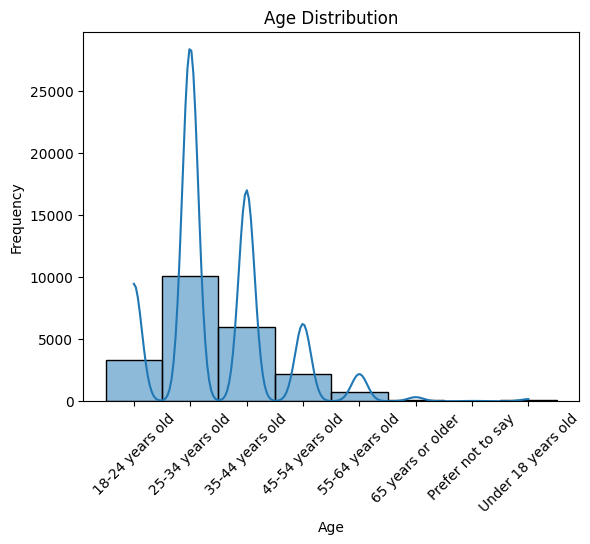

In [320]:
# Example: Distribution of age
sns.histplot(df['Age'].dropna(), bins=20, kde=True)
plt.title('Age Distribution')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.xticks(rotation=45)
plt.show()



### Task 1: Exploring Relationships with Scatter Plots



#### 1. Scatter Plot for Age vs. Job Satisfaction



In [321]:
df['ExperienceGroup'] = pd.cut(df['WorkExp'], bins=[0, 5, 10, 20, 30, 50], labels=['0-5', '5-10', '10-20', '20-30', '30+'])


Visualize the relationship between respondents' age (`Age`) and job satisfaction (`JobSatPoints_6`). Use this plot to identify any patterns or trends.




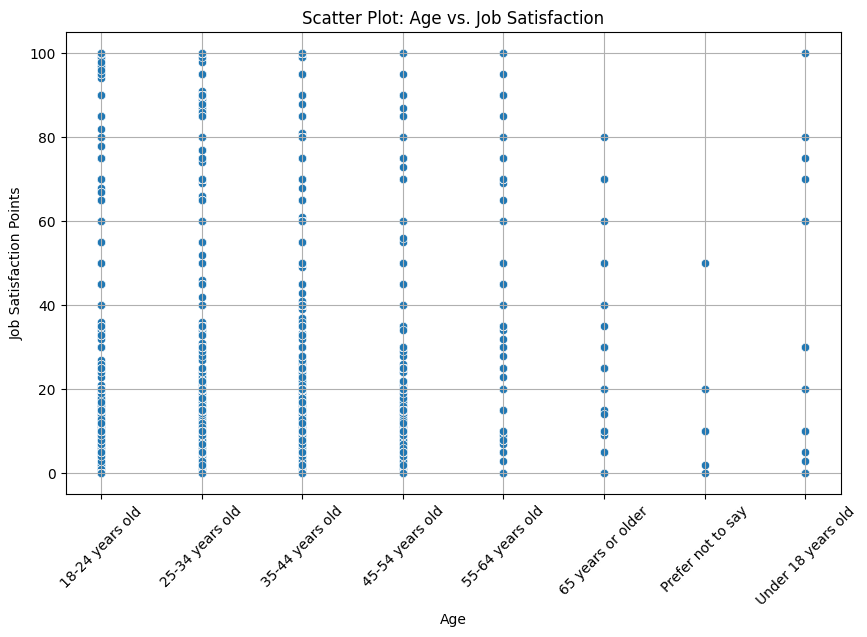

In [322]:
# prompt: write a code to Scatter Plot for Age vs. Job Satisfaction
# Visualize the relationship between respondents' age (Age) and job satisfaction (JobSatPoints_6). Use this plot to identify any patterns or trends.

plt.figure(figsize=(10, 6))
sns.scatterplot(x='Age', y='JobSatPoints_6', data=df)
plt.title('Scatter Plot: Age vs. Job Satisfaction')
plt.xlabel('Age')
plt.ylabel('Job Satisfaction Points')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()

#### 2. Scatter Plot for Compensation vs. Job Satisfaction


Explore the relationship between yearly compensation (`ConvertedCompYearly`) and job satisfaction (`JobSatPoints_6`) using a scatter plot.


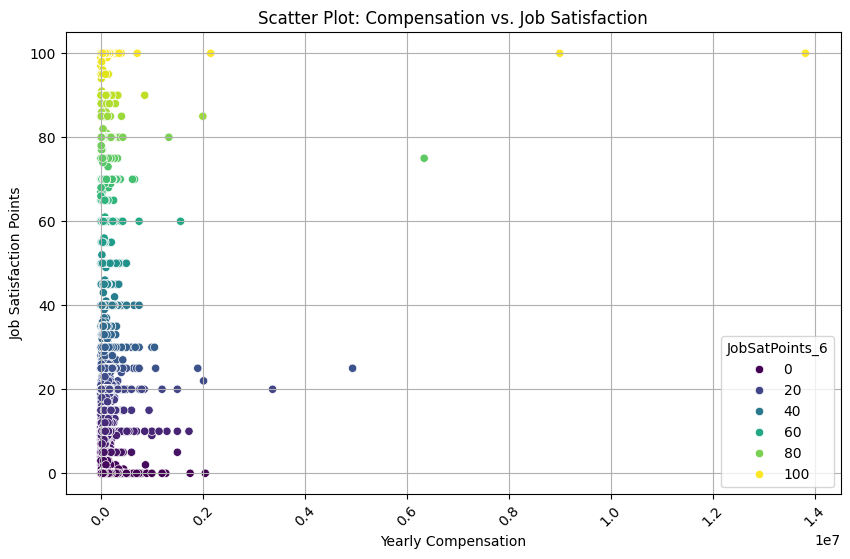

In [323]:
# prompt: write a code to Scatter Plot for Compensation vs. Job Satisfaction
# Explore the relationship between yearly compensation (ConvertedCompYearly) and job satisfaction (JobSatPoints_6) using a scatter plot.

plt.figure(figsize=(10, 6))
sns.scatterplot(x='ConvertedCompYearly', y='JobSatPoints_6', data=df, hue= "JobSatPoints_6", palette="viridis")
plt.title('Scatter Plot: Compensation vs. Job Satisfaction')
plt.xlabel('Yearly Compensation')
plt.ylabel('Job Satisfaction Points')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()

### Task 2: Enhancing Scatter Plots


#### 1. Scatter Plot with Trend Line for Age vs. Job Satisfaction



Add a regression line to the scatter plot of Age vs. JobSatPoints_6 to highlight trends in the data.


<ipython-input-324-669fda3ba552>:20: FutureWarning:

Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '[1, 3, 2, 3, 4, ..., 1, 2, 4, 1, 5]
Length: 16176
Categories (8, int64): [0 < 1 < 2 < 3 < 4 < 5 < 6 < 7]' has dtype incompatible with category, please explicitly cast to a compatible dtype first.



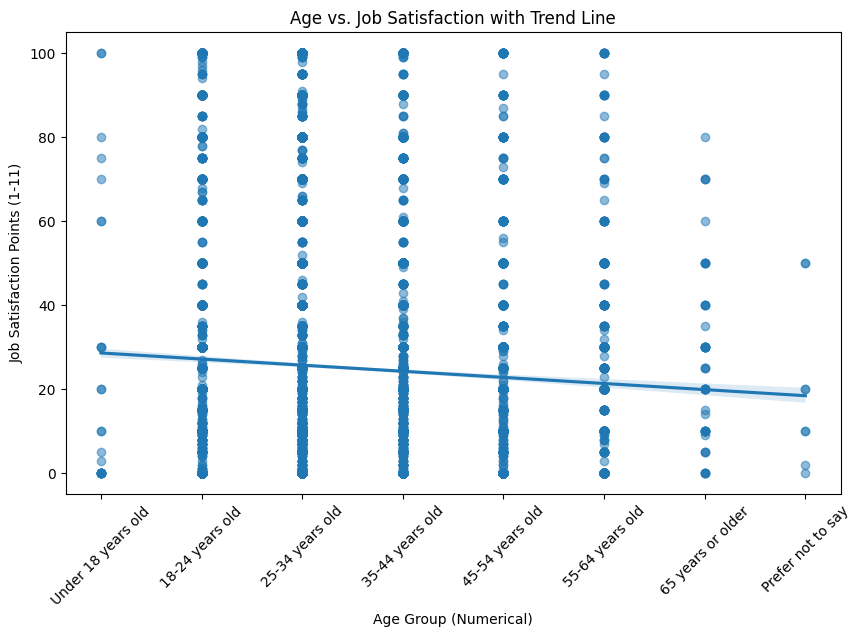

In [324]:
# Filter out missing values
df_filtered = df[(df['Age'].notna()) & (df['JobSatPoints_6'].notna())].copy() # explicitly create a copy

# Create a dictionary to map age ranges to numerical values
age_mapping = {
    'Under 18 years old': 0,
    '18-24 years old': 1,
    '25-34 years old': 2,
    '35-44 years old': 3,
    '45-54 years old': 4,
    '55-64 years old': 5,
    '65 years or older': 6,
    'Prefer not to say': 7
}

# Apply the mapping using apply, handle missing keys with -1
df_filtered.loc[:, 'AgeNum'] = df_filtered['Age'].apply(lambda x: age_mapping.get(x, -1))

# Convert 'AgeNum' to a numeric type, ensuring it is integer and then to ordered category.
df_filtered.loc[:, 'AgeNum'] = df_filtered['AgeNum'].astype(int).astype('category').cat.as_ordered()

# Create the scatter plot with regression line
plt.figure(figsize=(10, 6))
sns.regplot(x='AgeNum', y='JobSatPoints_6', data=df_filtered, scatter_kws={'alpha':0.5})

# Set labels and title
plt.xlabel('Age Group (Numerical)')
plt.ylabel('Job Satisfaction Points (1-11)')
plt.title('Age vs. Job Satisfaction with Trend Line')

# Customize x-axis labels
plt.xticks(range(8), age_mapping.keys(), rotation=45)

# Show the plot
plt.show()

#### 2. Scatter Plot for Age vs. Work Experience


Visualize the relationship between Age (`Age`) and Work Experience (`YearsCodePro`) using a scatter plot.


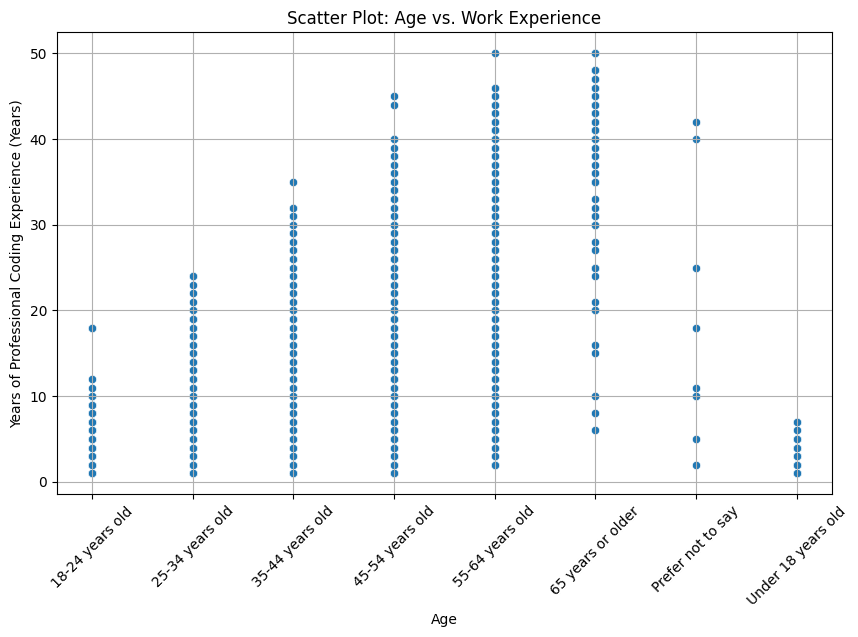

In [325]:
# prompt: write a code for Scatter Plot for Age vs. Work Experience
# Visualize the relationship between Age (Age) and Work Experience (YearsCodePro) using a scatter plot.

# Assuming 'df' is your DataFrame and it has been cleaned as shown in the provided code.

# Convert 'YearsCodePro' to numeric (handle potential errors)
df['YearsCodePro'] = pd.to_numeric(df['YearsCodePro'], errors='coerce')

plt.figure(figsize=(10, 6))
sns.scatterplot(x='Age', y='YearsCodePro', data=df)
plt.title('Scatter Plot: Age vs. Work Experience')
plt.xlabel('Age')
plt.ylabel('Years of Professional Coding Experience (Years)')  # Added "(Years)"
plt.xticks(rotation=45)
plt.grid(True)
plt.show()

### Task 3: Combining Scatter Plots with Additional Features


#### 1. Bubble Plot of Compensation vs. Job Satisfaction with Age as Bubble Size



Create a bubble plot to explore the relationship between yearly compensation (`ConvertedCompYearly`) and job satisfaction (`JobSatPoints_6`), with bubble size representing age.


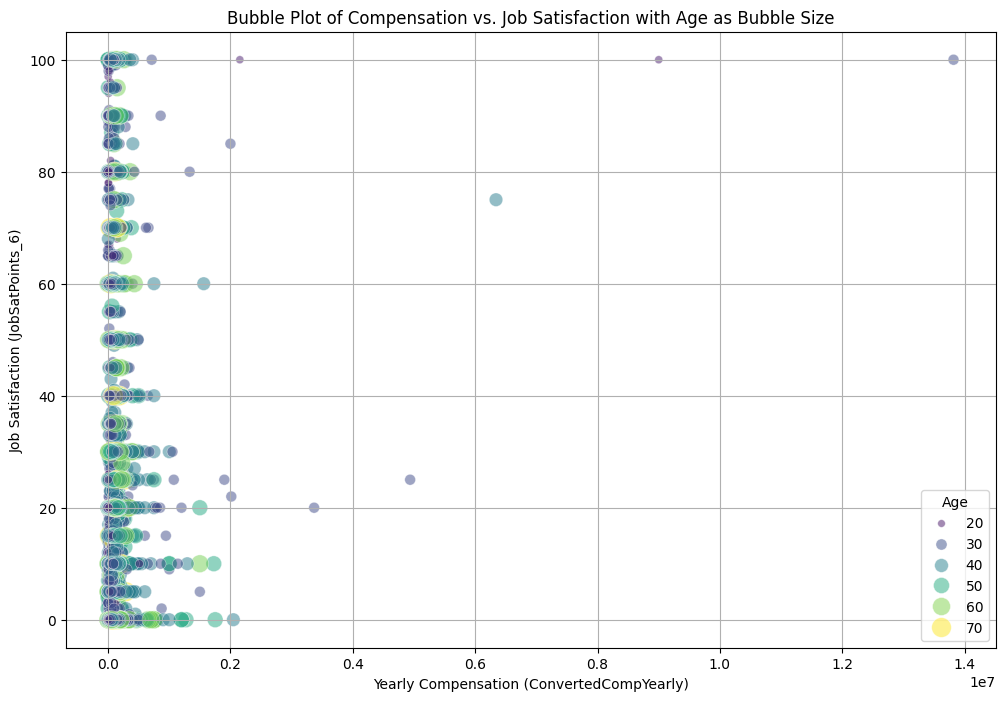

In [283]:
# Convert the 'Age' column to numeric values for bubble size
age_mapping = {
    'Under 18 years old': 17, '18-24 years old': 21, '25-34 years old': 29, '35-44 years old': 39,
    '45-54 years old': 49, '55-64 years old': 59, '65 years or older': 70, 'Prefer not to say': None
}
df['AgeNum'] = df['Age'].map(age_mapping)

# Filter out rows with missing values in 'ConvertedCompYearly', 'JobSatPoints_6', and 'AgeNum'
df_filtered = df.dropna(subset=['ConvertedCompYearly', 'JobSatPoints_6', 'AgeNum'])

# Create the bubble plot
plt.figure(figsize=(12, 8))
bubble_plot = sns.scatterplot(data=df_filtered, x='ConvertedCompYearly', y='JobSatPoints_6',
                              size='AgeNum', sizes=(20, 200), alpha=0.5, hue='AgeNum', palette='viridis')
plt.title('Bubble Plot of Compensation vs. Job Satisfaction with Age as Bubble Size')
plt.xlabel('Yearly Compensation (ConvertedCompYearly)')
plt.ylabel('Job Satisfaction (JobSatPoints_6)')
plt.legend(title='Age')
plt.grid(True)
plt.show()

#### 2. Scatter Plot for Popular Programming Languages by Job Satisfaction


Visualize the popularity of programming languages (`LanguageHaveWorkedWith`) against job satisfaction using a scatter plot. Use points to represent satisfaction levels for each language.


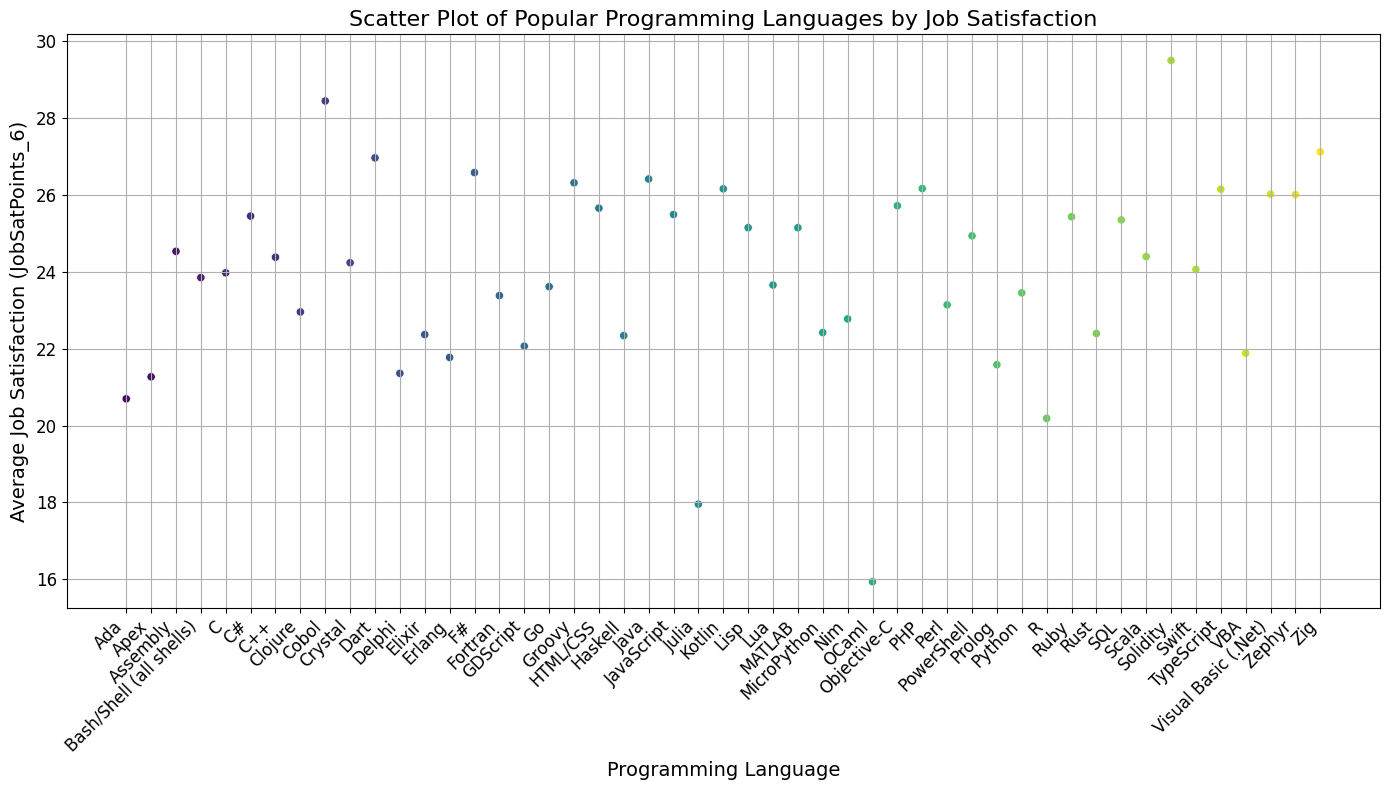

In [284]:
# Filter out rows with missing values in 'JobSatPoints_6' and 'LanguageHaveWorkedWith'
df_filtered = df.dropna(subset=['JobSatPoints_6', 'LanguageHaveWorkedWith'])

# Explode the 'LanguageHaveWorkedWith' column by splitting it by ';' and stacking the results
df_exploded = df_filtered.assign(LanguageHaveWorkedWith=df_filtered['LanguageHaveWorkedWith'].str.split(';')).explode('LanguageHaveWorkedWith')

# Calculate the average job satisfaction for each language
avg_job_sat = df_exploded.groupby('LanguageHaveWorkedWith')['JobSatPoints_6'].mean().reset_index()

# Create the scatter plot
plt.figure(figsize=(14, 8))
sns.scatterplot(data=avg_job_sat, x='LanguageHaveWorkedWith', y='JobSatPoints_6', hue='LanguageHaveWorkedWith', palette='viridis', legend=False)

# Enhance the plot's aesthetics
plt.title('Scatter Plot of Popular Programming Languages by Job Satisfaction', fontsize=16)
plt.xlabel('Programming Language', fontsize=14)
plt.ylabel('Average Job Satisfaction (JobSatPoints_6)', fontsize=14)
plt.xticks(rotation=45, ha='right', fontsize=12)
plt.yticks(fontsize=12)
plt.grid(True)

# Adjust the layout to ensure labels are not cut off
plt.tight_layout()

# Show the plot
plt.show()

### Task 4: Scatter Plot Comparisons Across Groups


#### 1. Scatter Plot for Compensation vs. Job Satisfaction by Employment Type


Visualize the relationship between yearly compensation (`ConvertedCompYearly`) and job satisfaction (`JobSatPoints_6`), categorized by employment type (`Employment`). Use color coding or markers to differentiate between employment types.


In [285]:
# Display unique values in 'Employment'
print("Unique Employment Values:\n", df['Employment'].unique())

# Define a mapping dictionary for grouping
employment_mapping = {
    'Employed full-time': 'Employed',
    'Employed part-time': 'Employed',
    'Independent contractor, freelancer, or self-employed': 'Self-Employed',
    'Student': 'Student',
    'Not employed, but looking for work': 'Unemployed',
    'Not employed, and not looking for work': 'Not Looking',
    'Retired': 'Retired',
    'Prefer not to say': 'Prefer not to say',
    'I lost my job and I am not looking for work': 'Not Looking',
    'I lost my job and I am looking for work': 'Unemployed'
}

# Apply the mapping to create a new column 'EmploymentGroup'
df['EmploymentGroup'] = df['Employment'].map(employment_mapping)

# Verify the new column
print("\nUnique Employment Groups:\n", df['EmploymentGroup'].unique())

# Display value counts for verification
print("\nEmployment Group Counts:\n", df['EmploymentGroup'].value_counts())

# Display sample of data with added column
print("\nSample of the DataFrame with the new 'EmploymentGroup' column:")
print(df[['Employment', 'EmploymentGroup']].head())

Unique Employment Values:
 ['Employed, full-time;Student, full-time;Indepe..., 'Employed, full-time', 'Independent contractor, freelancer, or self-e..., 'Employed, full-time;Student, part-time', 'Employed, full-time;Independent contractor, f..., ..., 'Not employed, but looking for work;Independen..., 'Employed, full-time;Not employed, but looking..., 'Independent contractor, freelancer, or self-e..., 'Employed, full-time;Student, full-time;Not em..., 'Student, full-time;Not employed, but looking ...]
Length: 53
Categories (110, object): ['Employed, full-time', 'Employed, full-time;Employed, part-time',
                           'Employed, full-time;Independent contractor, f..., 'Employed, full-time;Independent contractor, f...,
                           ..., 'Student, full-time;Student, part-time;Retired',
                           'Student, part-time', 'Student, part-time;Employed, part-time',
                           'Student, part-time;Retired']

Unique Employment Groups:
 [nan

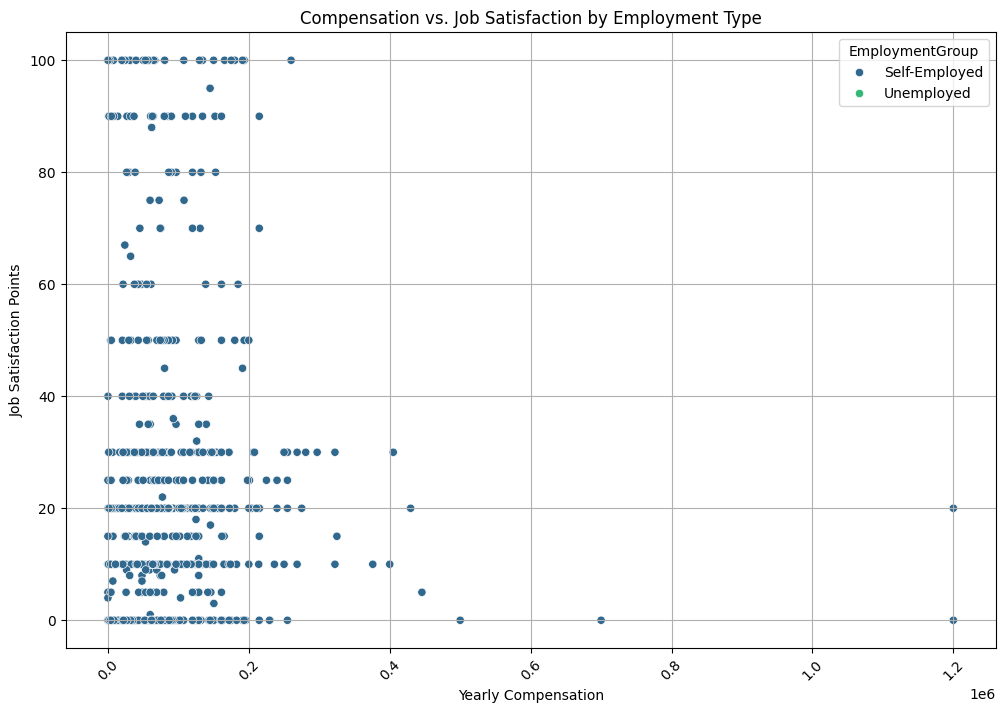

In [286]:
# prompt: write a code for Task 4: Scatter Plot Comparisons Across Groups
# 1. Scatter Plot for Compensation vs. Job Satisfaction by Employment Type
# Visualize the relationship between yearly compensation (ConvertedCompYearly) and job satisfaction (JobSatPoints_6), categorized by employment type (Employment). Use color coding or markers to differentiate between employment types.

# Create the scatter plot
plt.figure(figsize=(12, 8))
sns.scatterplot(data=df, x='ConvertedCompYearly', y='JobSatPoints_6', hue='EmploymentGroup', palette='viridis')
plt.title('Compensation vs. Job Satisfaction by Employment Type')
plt.xlabel('Yearly Compensation')
plt.ylabel('Job Satisfaction Points')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()

#### 2. Scatter Plot for Work Experience vs. Age Group by Country


Compare work experience (`YearsCodePro`) across different age groups (`Age`) and countries (`Country`). Use colors to represent different countries and markers for age groups.


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from typing import Dict, List, Tuple
import numpy as np

def convert_years_code_pro_to_numeric(df: pd.DataFrame) -> pd.DataFrame:
    """Converts the 'YearsCodePro' column to numeric, coercing errors to NaN.

    Args:
        df (pd.DataFrame): Input DataFrame.

    Returns:
        pd.DataFrame: DataFrame with 'YearsCodePro' as numeric.
    """
    df['YearsCodePro'] = pd.to_numeric(df['YearsCodePro'], errors='coerce')
    return df


def map_and_group_age(df: pd.DataFrame) -> pd.DataFrame:
    """Maps age ranges to broader categories and creates an 'AgeGroup' column.

    Args:
        df (pd.DataFrame): Input DataFrame with an 'Age' column.

    Returns:
        pd.DataFrame: DataFrame with the added 'AgeGroup' column.
    """
    age_mapping: Dict[str, str] = {
        'Under 18 years old': 'Under 18',
        '18-24 years old': '18-24',
        '25-34 years old': '25-34',
        '35-44 years old': '35-44',
        '45-54 years old': '45-54',
        '55-64 years old': '55-64',
        '65 years or older': '65+',
        'Prefer not to say': 'Prefer not to say'
    }
    df['AgeGroup'] = df['Age'].map(age_mapping)
    return df


def filter_missing_values(df: pd.DataFrame, subset: List[str]) -> pd.DataFrame:
    """Removes rows with missing values in specified columns.

    Args:
        df (pd.DataFrame): Input DataFrame.
        subset (List[str]): List of columns to check for missing values.

    Returns:
        pd.DataFrame: DataFrame with missing values removed from the specified columns.
    """
    return df.dropna(subset=subset)


def group_countries(df: pd.DataFrame, group_size: int = 10) -> List[List[str]]:
    """Groups unique country names into sublists of a specified size.

    Args:
        df (pd.DataFrame): Input DataFrame with a 'Country' column.
        group_size (int): The size of each country group (default is 10).

    Returns:
        List[List[str]]: List of country groups.
    """
    unique_countries: np.ndarray = df['Country'].unique()
    country_groups: List[List[str]] = [list(unique_countries[i:i + group_size])
                                        for i in range(0, len(unique_countries), group_size)]
    return country_groups


def calculate_subplot_dimensions(country_groups: List[List[str]], num_cols: int = 2) -> Tuple[int, int]:
    """Calculates the number of rows and columns for a grid of subplots.

    Args:
        country_groups (List[List[str]]): List of country groups.
        num_cols (int): The number of columns (default is 2).

    Returns:
        Tuple[int, int]: A tuple containing the number of rows and columns.
    """
    num_subplots = len(country_groups)
    num_rows = (num_subplots + num_cols - 1) // num_cols
    return num_rows, num_cols

def create_scatter_subplots(df: pd.DataFrame, country_groups: List[List[str]], num_rows: int, num_cols: int) -> None:
    """Creates and displays a grid of scatter plots.

    Args:
        df (pd.DataFrame): Input DataFrame.
        country_groups (List[List[str]]): List of country groups.
        num_rows (int): The number of rows for the subplots.
        num_cols (int): The number of columns for the subplots.
    """
    fig, axes = plt.subplots(num_rows, num_cols, figsize=(18, 6 * num_rows), sharey=True)
    axes = axes.flatten()

    for i, countries in enumerate(country_groups):
        ax = axes[i]
        df_subset = df[df['Country'].isin(countries)]

        sns.scatterplot(x='YearsCodePro', y='AgeGroup', hue='Country', data=df_subset, ax=ax, alpha=0.7, s=60)

        ax.set_title(f"Countries {i * 10 + 1}-{min((i + 1) * 10, len(df['Country'].unique()))}", fontsize=14)
        ax.set_xlabel('Years of Professional Coding Experience', fontsize=12)
        ax.set_ylabel('Age Group', fontsize=12)
        ax.tick_params(axis='x', labelsize=10)
        ax.tick_params(axis='y', labelsize=10)
        ax.grid(True)

        handles, labels = ax.get_legend_handles_labels()
        ax.legend(handles, labels, title='Country', bbox_to_anchor=(1.05, 1), loc='upper left', fontsize=10, frameon=False)

    # Hide unused subplots
    for j in range(i + 1, len(axes)):
        axes[j].set_visible(False)

    plt.tight_layout(pad=3.0)
    plt.show()

def main():
    """Main function to orchestrate data processing and plotting."""
    file_path = "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/n01PQ9pSmiRX6520flujwQ/survey-data.csv"
    df = pd.read_csv(file_path)

    df = convert_years_code_pro_to_numeric(df)
    df = map_and_group_age(df)
    df_filtered = filter_missing_values(df, subset=['YearsCodePro', 'AgeGroup', 'Country'])
    country_groups = group_countries(df_filtered)
    num_rows, num_cols = calculate_subplot_dimensions(country_groups)
    create_scatter_subplots(df_filtered, country_groups, num_rows, num_cols)


if __name__ == "__main__":
    main()

<ipython-input-287-9d554a8d1661>:17: FutureWarning:

Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`

<ipython-input-287-9d554a8d1661>:17: FutureWarning:

The behavior of Series.replace (and DataFrame.replace) with CategoricalDtype is deprecated. In a future version, replace will only be used for cases that preserve the categories. To change the categories, use ser.cat.rename_categories instead.



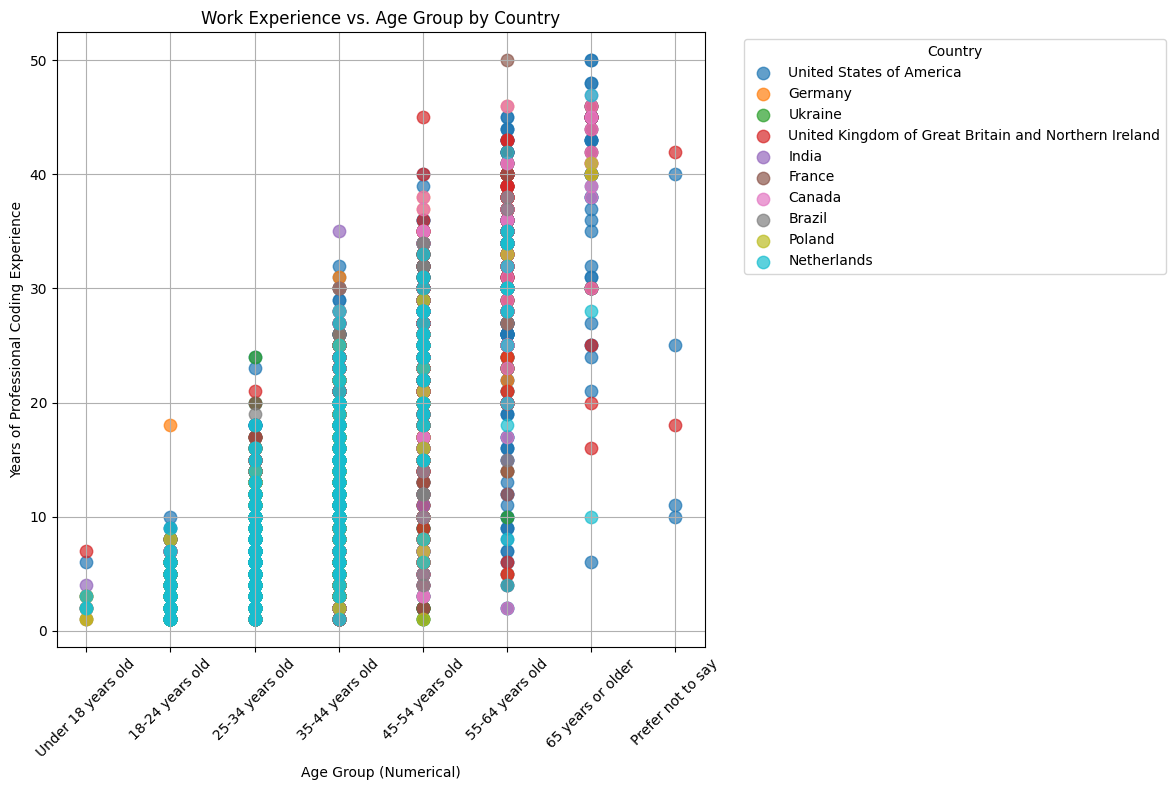

In [287]:
# Filter out missing values
df_filtered = df.dropna(subset=['Age', 'YearsCodePro', 'Country'])

# Create a dictionary to map age ranges to numerical values
age_mapping = {
    'Under 18 years old': 0,
    '18-24 years old': 1,
    '25-34 years old': 2,
    '35-44 years old': 3,
    '45-54 years old': 4,
    '55-64 years old': 5,
    '65 years or older': 6,
    'Prefer not to say': 7
}

# Apply the mapping using assign (with explicit inference)
df_filtered = df_filtered.assign(AgeNum=df_filtered['Age'].replace(age_mapping).infer_objects(copy=False))

# Convert 'YearsCodePro' to numeric (improved handling of non-numeric values)
def convert_to_numeric(x):
    try:
        return pd.to_numeric(x)
    except:
        return None  # Or handle non-numeric values differently (e.g., imputation)

df_filtered['YearsCodePro'] = df_filtered['YearsCodePro'].apply(convert_to_numeric)

# Select top 10 countries for better visualization
top_10_countries = df_filtered['Country'].value_counts().head(10).index.tolist()

# Create the scatter plot
plt.figure(figsize=(12, 8))

for country in top_10_countries:
    country_data = df_filtered[df_filtered['Country'] == country]
    plt.scatter(country_data['AgeNum'], country_data['YearsCodePro'],
                label=country,
                marker='o',
                s=80,
                alpha=0.7)

# Set labels and title
plt.xlabel('Age Group (Numerical)')
plt.ylabel('Years of Professional Coding Experience')
plt.title('Work Experience vs. Age Group by Country')

# Customize x-axis labels
plt.xticks(range(8), age_mapping.keys(), rotation=45)

# Legend
plt.legend(loc='upper left', bbox_to_anchor=(1.05, 1), title='Country')

# Show the plot
plt.grid(True)
plt.tight_layout()
plt.show()

### Final Step: Review


With these scatter plots, you will have analyzed data relationships across multiple dimensions, including compensation, job satisfaction, employment types, and demographics, to uncover meaningful trends in the developer community.


### Summary


After completing this lab, you will be able to:
- Analyze how numerical variables relate across specific groups, such as employment types and countries.
- Use scatter plots effectively to represent multiple variables with color, size, and markers.
- Gain insights into compensation, satisfaction, and demographic trends using advanced scatter plot techniques.


## Authors:
Ayushi Jain


### Other Contributors:
- Rav Ahuja
- Lakshmi Holla
- Malika


<!--## Change Log
|Date (YYYY-MM-DD)|Version|Changed By|Change Description|
|-|-|-|-|               
|2024-10-07|1.2|Madhusudan Moole|Reviewed and updated lab|                                                                                      
|2024-10-06|1.0|Raghul Ramesh|Created lab|-->


Copyright © IBM Corporation. All rights reserved.
